In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def imshow_comparison(original, processed, cmap='gray'):
    plt.figure(figsize=(20, 10))

    # عرض الصورة الأصلية
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # عرض الصورة المعالجة
    plt.subplot(1, 2, 2)
    plt.title("Processed Image")
    plt.imshow(processed, cmap=cmap)
    plt.axis('off')

In [14]:
img = cv2.imread(r"C:\Users\mrym9\Downloads\WhatsApp Image 2024-10-12 at 14.23.04_f0de4b03.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [15]:
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

In [16]:
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)


In [17]:
kernel = np.ones((5, 5), np.uint8)
dilated_mask = cv2.dilate(mask, kernel, iterations=1)
eroded_mask = cv2.erode(dilated_mask, kernel, iterations=1)

In [18]:
contours, _ = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [19]:
largest_contour = max(contours, key=cv2.contourArea)


In [20]:
final_mask = np.zeros_like(mask)
cv2.drawContours(final_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

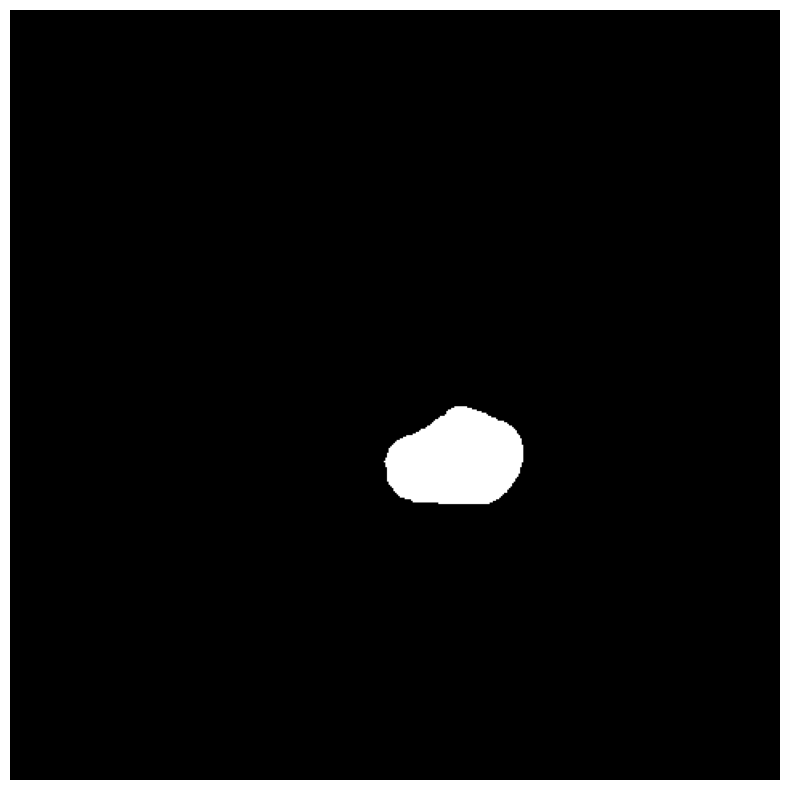

In [21]:
imshow(final_mask)


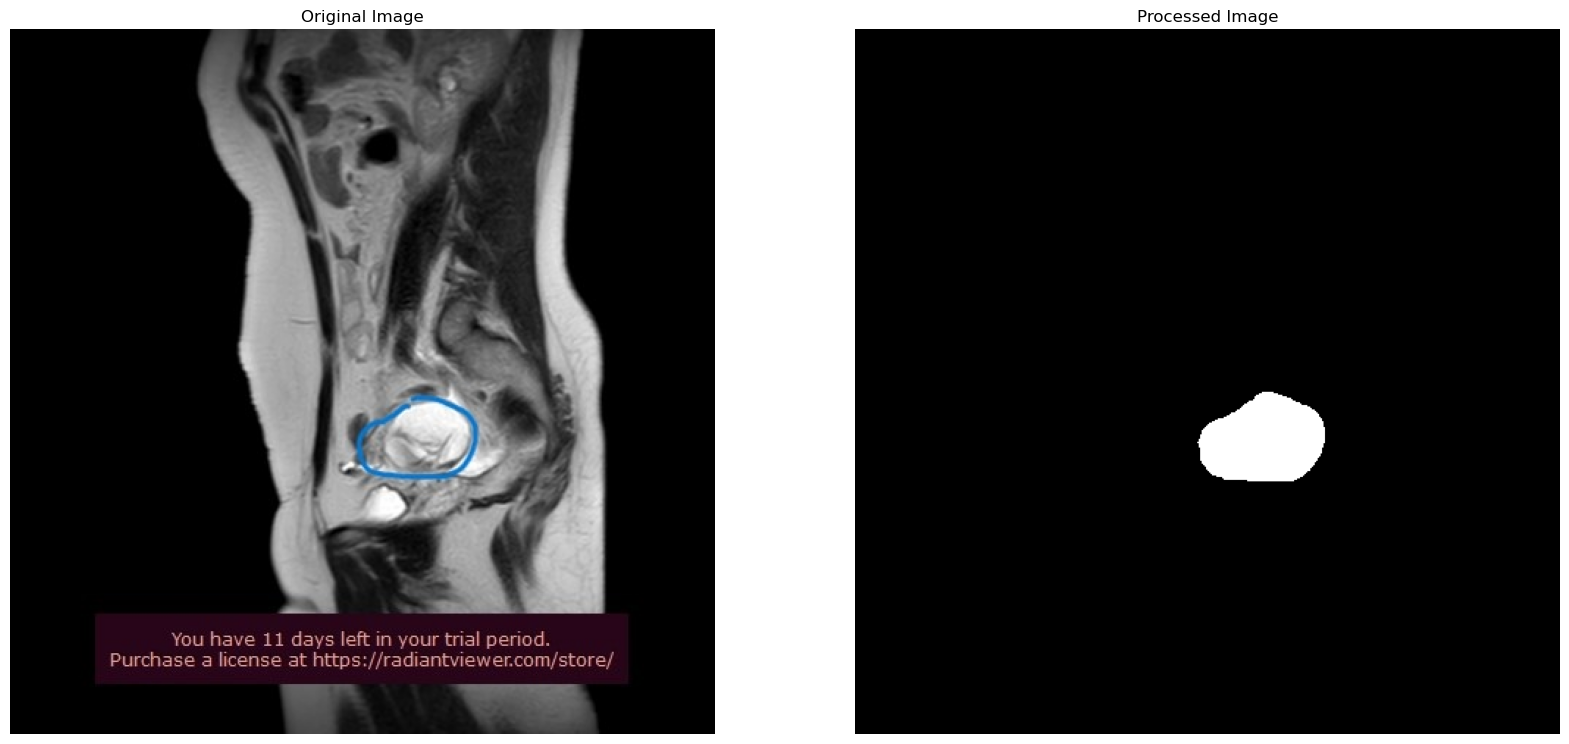

In [22]:
imshow_comparison(img, final_mask)
